# Ingestion

We are using the UCI dataset called the "adult data set." The outcome/target is an indicator if the person makes more than $50k (the definition of adult?).

In [1]:
import yellowbrick
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook

url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'
orig_data = pd.read_csv(url,delimiter=',', header=None)
columns = ['age', 'workclass', 'fnlwgt', 'education', 'educationnum', 'maritalstatus', 'occupation','relationship','race', 'sex', 'capitalgain', 'capitalloss','hoursperweek','nativecountry','outcome']
orig_data.columns = columns

# Wrangling
I'm not exactly proud of some of this wrangling but I'm trying to also get work done on our capstone.

### First, we strip leading spaces and change dashes to underscores. Also, to make it more "one hot"-able, I am making the values lower cased.

In [2]:
instances = orig_data.apply(lambda x: x.astype(str).str.lower())
instances = instances.apply(lambda x: x.astype(str).str.replace('\-', '_'))
instances = instances.apply(lambda x: x.astype(str).str.strip())

instances.describe(include = 'all')

,age,workclass,fnlwgt,education,educationnum,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,nativecountry,outcome
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561
unique,73,9,21648,16,16,7,15,6,5,2,119,92,94,42,2
top,36,private,203488,hs_grad,9,married_civ_spouse,prof_specialty,husband,white,male,0,0,40,united_states,<=50k
freq,898,22696,13,10501,10501,14976,4140,13193,27816,21790,29849,31042,15217,29170,24720


### Clean up the education field.

In [3]:
instances.loc[instances['education'] =='hs_grad', 'education'] = 'highschool'
instances.loc[instances['education'] =='some_college', 'education'] = 'some_college'
instances.loc[instances['education'] =='bachelors', 'education'] = 'fouryear_degree'
instances.loc[instances['education'] =='masters', 'education'] = 'gt_college'
instances.loc[instances['education'] =='assoc_voc', 'education'] = 'twoyear_degree'
instances.loc[instances['education'] =='11th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='assoc_acdm', 'education'] = 'twoyear_degree'
instances.loc[instances['education'] =='10th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='7th_8th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='prof_school', 'education'] = 'gt_college'
instances.loc[instances['education'] =='9th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='12th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='doctorate', 'education'] = 'gt_college'
instances.loc[instances['education'] =='5th_6th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='1st_4th', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='preschool', 'education'] = 'lt_highschool'
instances.loc[instances['education'] =='\?', 'education'] = 'unknown'



### One hot some of the key category fields

In [4]:
import pandas as pd
instances.loc[instances['workclass'] =='\?', 'workclass'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['workclass'], prefix='workclass')],axis=1)
instances.drop(['workclass'],axis=1, inplace=True)

instances.loc[instances['maritalstatus'] =='\?', 'maritalstatus'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['maritalstatus'], prefix='maritalstatus')],axis=1)
instances.drop(['maritalstatus'],axis=1, inplace=True)

instances.loc[instances['relationship'] =='\?', 'relationship'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['relationship'], prefix='relationship')],axis=1)
instances.drop(['relationship'],axis=1, inplace=True)

instances.loc[instances['race'] =='\?', 'race'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['race'], prefix='race')],axis=1)
instances.drop(['race'],axis=1, inplace=True)

instances.loc[instances['sex'] =='\?', 'sex'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['sex'], prefix='sex')],axis=1)
instances.drop(['sex'],axis=1, inplace=True)

instances.loc[instances['education'] =='\?', 'education'] = 'unknown'
instances = pd.concat([instances,pd.get_dummies(instances['education'], prefix='edu')],axis=1)
instances.drop(['education'],axis=1, inplace=True)

In [5]:
instances.describe(include = 'all')

,age,fnlwgt,educationnum,occupation,capitalgain,capitalloss,hoursperweek,nativecountry,outcome,workclass_?,...,race_other,race_white,sex_female,sex_male,edu_fouryear_degree,edu_gt_college,edu_highschool,edu_lt_highschool,edu_some_college,edu_twoyear_degree
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
unique,73,21648,16,15,119,92,94,42,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,36,203488,9,prof_specialty,0,0,40,united_states,<=50k,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,898,13,10501,4140,29849,31042,15217,29170,24720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056386,...,0.008323,0.854274,0.330795,0.669205,0.164461,0.083290,0.322502,0.130616,0.223918,0.075213
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230670,...,0.090851,0.352837,0.470506,0.470506,0.370699,0.276324,0.467441,0.336986,0.416874,0.263738
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000


### More wrangling

In [6]:
instances['anycapitalgain'] = 0
instances.loc[instances['capitalgain'] != '0', 'anycapitalgain'] = 1

instances['anycapitalloss'] = 0
instances.loc[instances['capitalloss'] != '0', 'anycapitalloss'] = 1

In [7]:
instances.describe(include = 'all')

,age,fnlwgt,educationnum,occupation,capitalgain,capitalloss,hoursperweek,nativecountry,outcome,workclass_?,...,sex_female,sex_male,edu_fouryear_degree,edu_gt_college,edu_highschool,edu_lt_highschool,edu_some_college,edu_twoyear_degree,anycapitalgain,anycapitalloss
count,32561,32561,32561,32561,32561,32561,32561,32561,32561,32561.000000,...,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
unique,73,21648,16,15,119,92,94,42,2,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,36,203488,9,prof_specialty,0,0,40,united_states,<=50k,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,898,13,10501,4140,29849,31042,15217,29170,24720,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.056386,...,0.330795,0.669205,0.164461,0.083290,0.322502,0.130616,0.223918,0.075213,0.083290,0.046651
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.230670,...,0.470506,0.470506,0.370699,0.276324,0.467441,0.336986,0.416874,0.263738,0.276324,0.210893
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,...,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [8]:
#us_native
#gte_40hrs_week

instances['us_native'] = 0
instances.loc[instances['nativecountry'] == 'united_states', 'us_native'] = 1

instances['gte_40hrs_week'] = 0
instances.loc[instances['hoursperweek'].astype(int) > 40, 'gte_40hrs_week'] = 1

instances['age'] = instances['age'].astype(int) 

instances['income_gt_50k'] = 0
instances.loc[instances['outcome'] == '>50k', 'income_gt_50k'] = 1


In [9]:
instances

,age,fnlwgt,educationnum,occupation,capitalgain,capitalloss,hoursperweek,nativecountry,outcome,workclass_?,...,edu_gt_college,edu_highschool,edu_lt_highschool,edu_some_college,edu_twoyear_degree,anycapitalgain,anycapitalloss,us_native,gte_40hrs_week,income_gt_50k
0,39,77516,13,adm_clerical,2174,0,40,united_states,<=50k,0,...,0,0,0,0,0,1,0,1,0,0
1,50,83311,13,exec_managerial,0,0,13,united_states,<=50k,0,...,0,0,0,0,0,0,0,1,0,0
2,38,215646,9,handlers_cleaners,0,0,40,united_states,<=50k,0,...,0,1,0,0,0,0,0,1,0,0
3,53,234721,7,handlers_cleaners,0,0,40,united_states,<=50k,0,...,0,0,1,0,0,0,0,1,0,0
4,28,338409,13,prof_specialty,0,0,40,cuba,<=50k,0,...,0,0,0,0,0,0,0,0,0,0
5,37,284582,14,exec_managerial,0,0,40,united_states,<=50k,0,...,1,0,0,0,0,0,0,1,0,0
6,49,160187,5,other_service,0,0,16,jamaica,<=50k,0,...,0,0,1,0,0,0,0,0,0,0
7,52,209642,9,exec_managerial,0,0,45,united_states,>50k,0,...,0,1,0,0,0,0,0,1,1,1
8,31,45781,14,prof_specialty,14084,0,50,united_states,>50k,0,...,1,0,0,0,0,1,0,1,1,1
9,42,159449,13,exec_managerial,5178,0,40,united_states,>50k,0,...,0,0,0,0,0,1,0,1,0,1


In [26]:
instances.corr(method='pearson').style.format("{:.2}").background_gradient(cmap=plt.get_cmap('coolwarm'), axis=1)

# Computation and Analysis

In [11]:
s = instances.sample(frac=0.75, random_state=99)

#the original list... I will always go back to this for the columns
original_list = ['age','workclass_federal_gov','workclass_local_gov',
             'workclass_never_worked','workclass_private','workclass_self_emp_inc',
             'workclass_self_emp_not_inc','workclass_state_gov','workclass_without_pay',
             'maritalstatus_divorced','maritalstatus_married_af_spouse',
             'maritalstatus_married_civ_spouse','maritalstatus_married_spouse_absent',
             'maritalstatus_never_married','maritalstatus_separated','maritalstatus_widowed',
             'race_amer_indian_eskimo','race_asian_pac_islander','race_black','race_other',
             'race_white','sex_female','sex_male','edu_fouryear_degree','edu_gt_college',
             'edu_highschool','edu_lt_highschool','edu_some_college','edu_twoyear_degree',
             'anycapitalgain','anycapitalloss','us_native','gte_40hrs_week']

X_Columns = ['age','workclass_private','workclass_self_emp_inc',
             'workclass_self_emp_not_inc','workclass_state_gov','workclass_without_pay',
             'maritalstatus_divorced','maritalstatus_married_af_spouse',
             'maritalstatus_married_civ_spouse','maritalstatus_married_spouse_absent',
             'maritalstatus_never_married','maritalstatus_separated','maritalstatus_widowed',
             'race_amer_indian_eskimo','race_asian_pac_islander','race_black','race_other',
             'race_white','sex_female','sex_male','edu_fouryear_degree','gte_40hrs_week']


X_train = s[X_Columns]
y_train = s['income_gt_50k']

s2 = instances.loc[~instances.index.isin(s.index), :]

X_test = s2[X_Columns]
y_test = s2['income_gt_50k']

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()
/anaconda3/lib/python3.6/site-packages/scipy/stats/morestats.py:1309: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


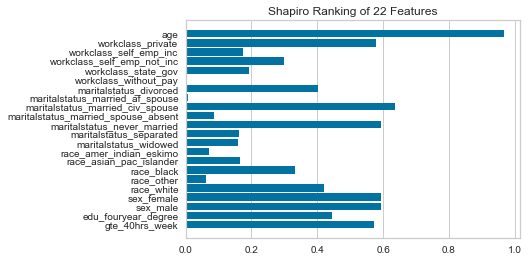

In [12]:
from yellowbrick.features import Rank1D

# Instantiate the 1D visualizer with the Sharpiro ranking algorithm
visualizer = Rank1D(features=X_Columns, algorithm='shapiro')

visualizer.fit(X_train, y_train)                # Fit the data to the visualizer
visualizer.transform(X_train)             # Transform the data
visualizer.poof(outpath="pcoords.png")                  # Draw/show/poof the data

In [13]:
from sklearn.ensemble import RandomForestRegressor

regressor = RandomForestRegressor(max_depth=7,n_estimators=50)
regressor.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=7,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=50, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [14]:
regressor.score(X_test, y_test)

0.3057091616921812

In [15]:
y_pred = regressor.predict(X_test)
y_pred

array([0.6787543 , 0.09453873, 0.60432092, ..., 0.16253647, 0.00995053,
       0.1725493 ])

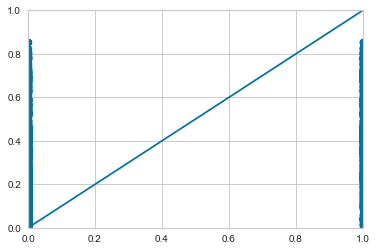

In [16]:
plt.scatter(x=y_test, y=y_pred)
plt.xlim([0,1])
plt.ylim([0,1])
plt.plot([0,1],[0,1])
plt.show()

/anaconda3/lib/python3.6/site-packages/yellowbrick/features/rankd.py:262: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  X = X.as_matrix()


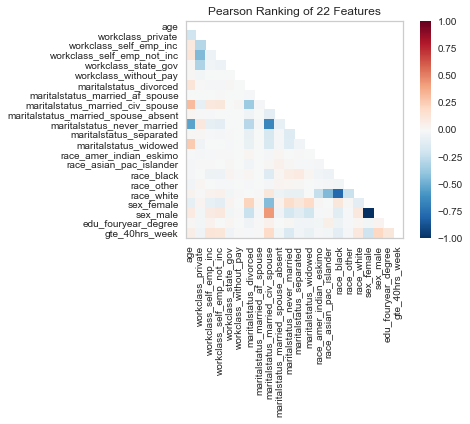

In [17]:
from yellowbrick.features import Rank2D

visualizer = Rank2D(algorithm="pearson")
visualizer.fit_transform(X_train)
visualizer.poof()

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import LabelEncoder, OneHotEncoder


class EncodeCategorical(BaseEstimator, TransformerMixin):
    """
    Encodes a specified list of columns or all columns if None.
    """

    def __init__(self, columns=None):
        self.columns  = [col for col in columns]
        self.encoders = None

    def fit(self, data, target=None):
        """
        Expects a data frame with named columns to encode.
        """
        # Encode all columns if columns is None
        if self.columns is None:
            self.columns = data.columns

        # Fit a label encoder for each column in the data frame
        self.encoders = {
            column: LabelEncoder().fit(data[column])
            for column in self.columns
        }
        return self

    def transform(self, data):
        """
        Uses the encoders to transform a data frame.
        """
        output = data.copy()
        for column, encoder in self.encoders.items():
            output[column] = encoder.transform(data[column])

        return output

from sklearn.metrics import f1_score
from sklearn.pipeline import Pipeline


def model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Instantiate the classification model and visualizer
    model.fit(X, y)

    expected  = y
    predicted = model.predict(X)

    # Compute and return the F1 score (the harmonic mean of precision and recall)
    return (f1_score(expected, predicted))

In [19]:
from sklearn.svm import LinearSVC, NuSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV, LogisticRegression, SGDClassifier
from sklearn.ensemble import BaggingClassifier, ExtraTreesClassifier, RandomForestClassifier

model_selection(X_train, y_train, LinearSVC())

0.5138846505950565

In [20]:
model_selection(X_train, y_train, LogisticRegressionCV())

0.5199798691494716

In [27]:
import matplotlib.pyplot as plt

from sklearn.pipeline import Pipeline
from yellowbrick.classifier import ClassificationReport


def visual_model_selection(X, y, estimator):
    """
    Test various estimators.
    """
    y = LabelEncoder().fit_transform(y.values.ravel())
    model = Pipeline([
         ('label_encoding', EncodeCategorical(X.keys())),
         ('one_hot_encoder', OneHotEncoder()),
         ('estimator', estimator)
    ])

    # Create a new figure to draw the classification report on
    _, ax = plt.subplots()

    # Instantiate the classification model and visualizer
    visualizer = ClassificationReport(
        model, ax=ax, classes=['income_gt_50k', 'income_lt_50k']
    )
    visualizer.fit(X, y)
    visualizer.score(X, y)

    # Note that to save the figure to disk, you can specify an outpath
    # argument to the poof method!
    visualizer.poof()

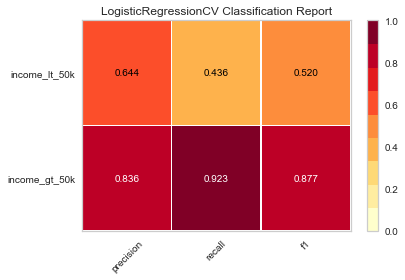

In [28]:
visual_model_selection(X_train, y_train, LogisticRegressionCV())

In [29]:
model_selection(X_train, y_train, LogisticRegressionCV())

0.5199798691494716

In [ ]:
Get the yellowbrick visualizer

Recursive FEature selection

Discrimination Threshold Visualizer